Logan Quandt

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
#load in dataframe
bank_df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', 'Data')

In [145]:
#ensure dataframe loaded in correctly
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [146]:
#view shape
bank_df.shape

(5000, 14)

In [147]:
#view data types
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [148]:
#find count of missing values
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [149]:
#check for duplicates
bank_df.duplicated().sum()

0

In [150]:
#view summary stats
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


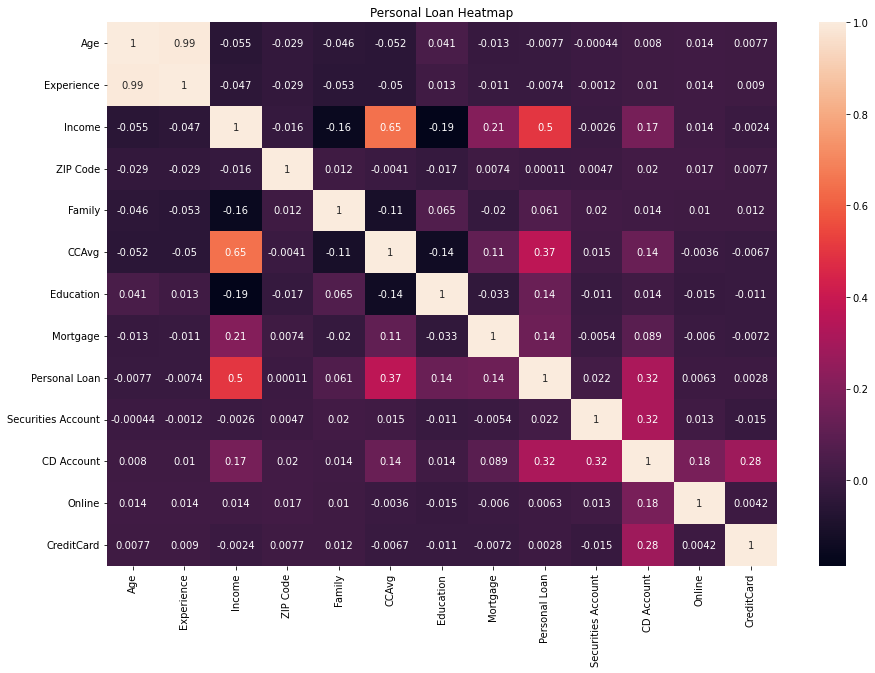

In [151]:
#create heatmap
plt.figure(figsize = (15,10))
sns.heatmap(bank_df.drop('ID', axis=1).corr(), annot=True)
plt.title('Personal Loan Heatmap')
plt.show()

C:\Users\logan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


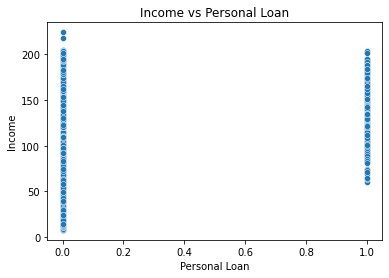

In [216]:
#explore income correlation with Personal loan
sns.scatterplot(bank_df['Personal Loan'], bank_df['Income'])
plt.title('Income vs Personal Loan')
plt.show()

In [228]:
#view income of those with and without personal loans
bank_df.groupby('Personal Loan')['Income'].mean()

Personal Loan
0     66.237389
1    144.745833
Name: Income, dtype: float64

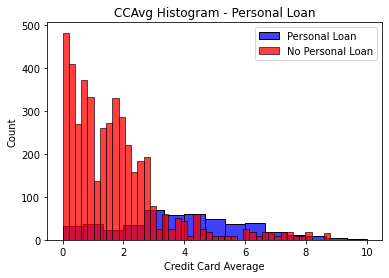

In [221]:
#explore CC avg correlation with Personal Loan
fig = plt.figure
sns.histplot(data = bank_df[bank_df['Personal Loan'] == 1], x='CCAvg', label='Personal Loan', color='blue')
sns.histplot(data = bank_df[bank_df['Personal Loan'] == 0], x='CCAvg', label='No Personal Loan', color = 'red')
plt.title("CCAvg Histogram - Personal Loan")
plt.xlabel('Credit Card Average')
plt.ylabel('Count')
plt.legend()
plt.show()

In [227]:
#view mean credit card debt for
bank_df.groupby('Personal Loan')['CCAvg'].mean()

Personal Loan
0    1.728982
1    3.905347
Name: CCAvg, dtype: float64

In [152]:
#set index to ID
bank_df.set_index('ID', inplace=True)
bank_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


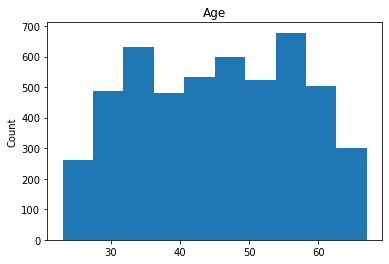

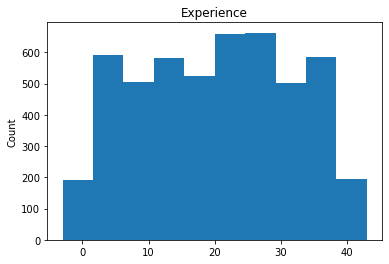

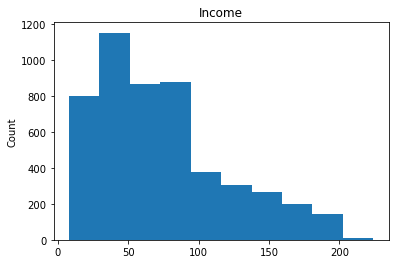

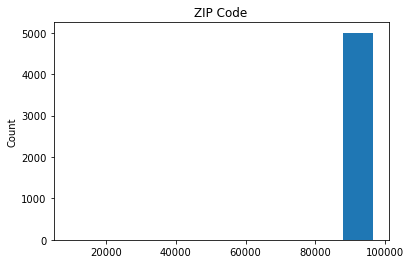

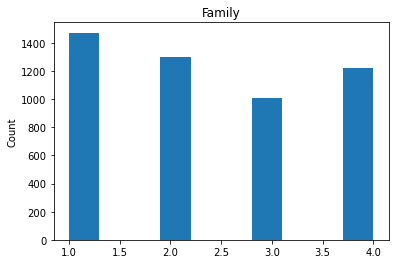

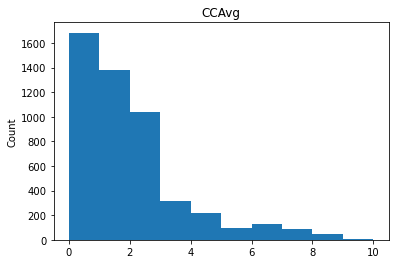

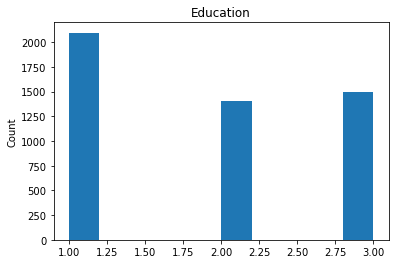

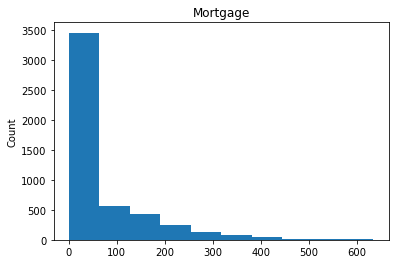

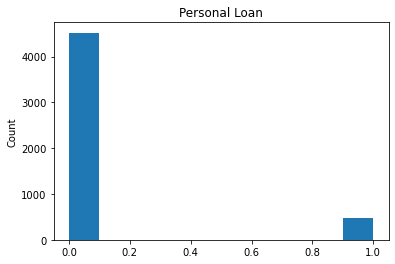

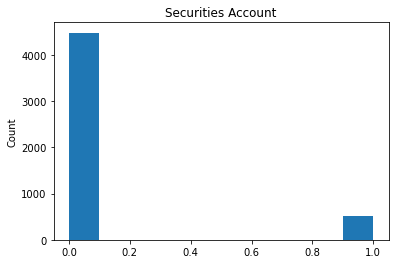

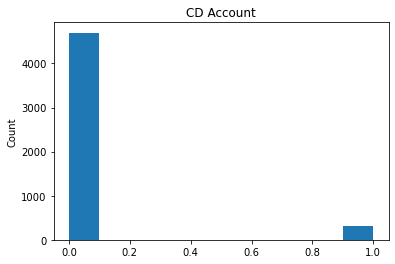

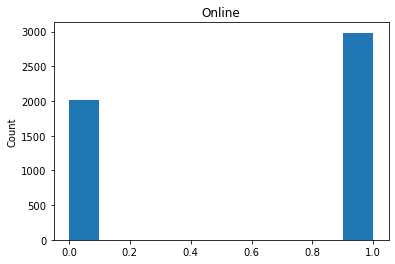

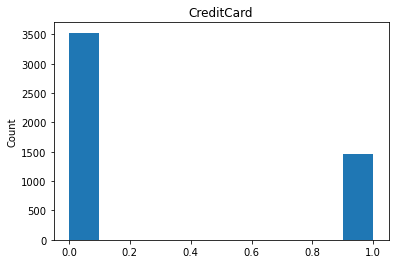

In [153]:
#create histograms for all the variables
for var in bank_df.columns:
    plt.hist(bank_df[var])
    plt.title(var)
    plt.ylabel('Count')
    plt.show()

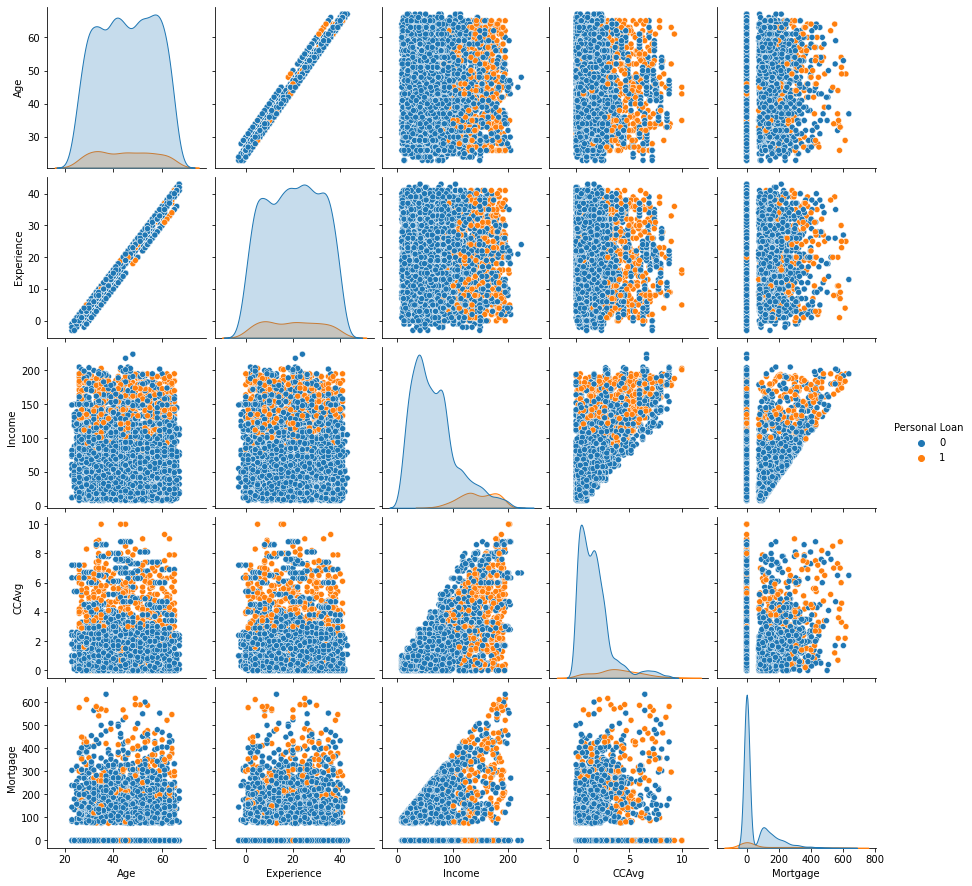

In [154]:
#plot pairplots using personal loan as hue
sns.pairplot(bank_df, hue = "Personal Loan", x_vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], y_vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])

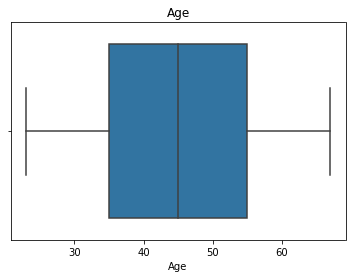

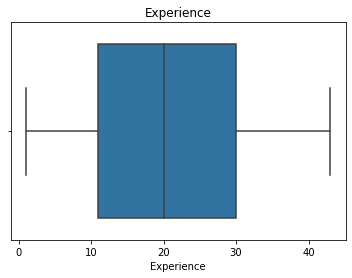

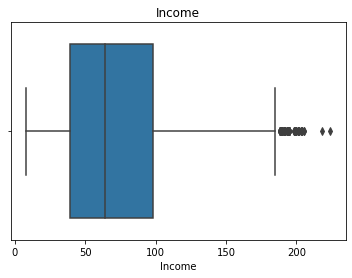

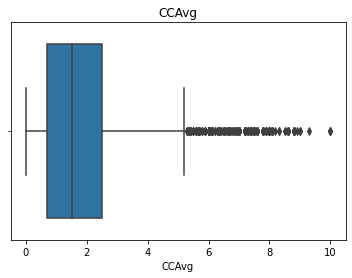

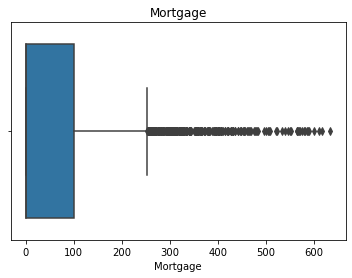

In [193]:
#view boxplots 
box_list = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for i in range(5):
    plt.title(box_list[i])
    sns.boxplot(x=bank_df[box_list[i]])
    plt.show()

In [155]:
#sort df by experience to view outliers
bank_df['Experience'].sort_values()

ID
4515    -3
2619    -3
4286    -3
3627    -3
3797    -2
        ..
1481    42
466     42
2847    43
3887    43
4361    43
Name: Experience, Length: 5000, dtype: int64

In [156]:
#apply function correcting outliers to median experience
bank_df['Experience'] = bank_df['Experience'].apply(lambda x: x if x > 0 else bank_df['Experience'].median())

In [157]:
#ensure fix was correct
bank_df['Experience'].sort_values()

ID
1        1.0
2447     1.0
2390     1.0
2368     1.0
2361     1.0
        ... 
4291    42.0
466     42.0
3887    43.0
4361    43.0
2847    43.0
Name: Experience, Length: 5000, dtype: float64

In [158]:
#check exact numbers of Personal loan customers
bank_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [159]:
#calculate baseline percentage of accuracy if model assumed all were negative
1-(480/5000)

0.904

In [160]:
#import libraries for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [161]:
#create training and test sets with 80/20 split, dropping zip code due to low correlation
x = bank_df.drop(['Personal Loan', "ZIP Code"], axis=1)
y = bank_df['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [162]:
#view class imbalance before SMOTE
from collections import Counter
Counter(y_train)

Counter({1: 343, 0: 3157})

In [163]:
#create standardizer
standardizer = StandardScaler()

In [164]:
#implement SMOTE for oversamlping due to class imbalance
from imblearn.over_sampling import SMOTE
SM = SMOTE(random_state = 43)
x_train_sm, y_train_sm = SM.fit_resample(x_train, y_train)

In [197]:
#verify SMOTE was successful
Counter(y_train_sm)

Counter({1: 3157, 0: 3157})

In [198]:
#create KNN model
knn = KNeighborsClassifier()

In [199]:
#create pipeline for KNN model
pipe = Pipeline([('scaler', standardizer), ('knn', knn)])

In [200]:
#create search space for KNN
search_space = [{'knn__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,13,24,25]}]

In [201]:
#use grid search to fit model
KNclassifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(x_train_sm, y_train_sm)

In [202]:
#get best parameters from gridsearch model
KNclassifier.best_estimator_.get_params()['knn__n_neighbors']

1

In [203]:
#make prediction on test set and calculate metrics for KNN
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
KNclassifier_pred = KNclassifier.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, KNclassifier_pred))
print("F1 Score:" ,f1_score(y_test, KNclassifier_pred))
print("Precision Score:", precision_score(y_test, KNclassifier_pred))
print('Recall Score:', recall_score(y_test, KNclassifier_pred))

Accuracy Score: 0.9386666666666666
F1 Score: 0.7070063694267515
Precision Score: 0.6271186440677966
Recall Score: 0.8102189781021898


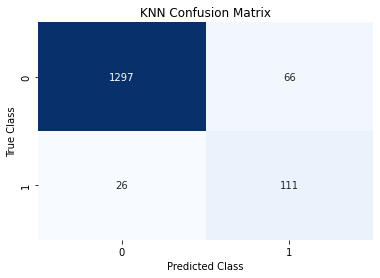

In [204]:
#create confusion matrix for KNN model
confusion_matrix_one = confusion_matrix(y_test, KNclassifier_pred)
KNconfusion_df = pd.DataFrame(confusion_matrix_one)
sns.heatmap(KNconfusion_df, annot=True, cbar=None, cmap='Blues', fmt='d')
plt.title('KNN Confusion Matrix')
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()

In [205]:
#create pipeline and search to choose best model from Logistic Reg, KNN and RFC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import liblinear

pipe2 = Pipeline([('scaler', standardizer), ('classifier', RandomForestClassifier())])

search_space2 = [{'classifier': [KNeighborsClassifier()], 'classifier__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
                 {'classifier': [LogisticRegression(max_iter=1000, solver='saga')], "classifier__penalty": ['l2'], 'classifier__C': np.logspace(0,4,10)},
                {'classifier': [RandomForestClassifier()], 'classifier__n_estimators': [10,100,1000], 'classifier__max_features': [1,2,3]}]

In [206]:
#find best model with gridsearch
classifier2 = GridSearchCV(pipe2, search_space2, cv=5, verbose=0).fit(x_train_sm, y_train_sm)

In [207]:
#view best model and parameters
classifier2.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', RandomForestClassifier(max_features=3, n_estimators=1000))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': RandomForestClassifier(max_features=3, n_estimators=1000),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 3,
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 1000,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [208]:
#fit gridsearch RFC model and print metrics
classifer2_pred = classifier2.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, classifer2_pred))
print("F1 Score:" ,f1_score(y_test, classifer2_pred))
print("Precision Score:", precision_score(y_test, classifer2_pred))
print('Recall Score:', recall_score(y_test, classifer2_pred))

Accuracy Score: 0.9733333333333334
F1 Score: 0.8591549295774649
Precision Score: 0.8299319727891157
Recall Score: 0.8905109489051095


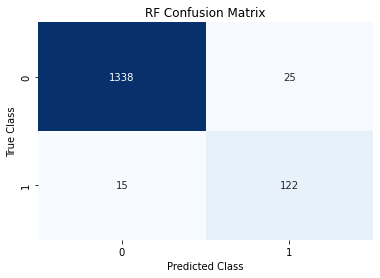

In [209]:
#create confusion matrix for RFC model
confusion_matrix_two = confusion_matrix(y_test, classifer2_pred)
confusion_df = pd.DataFrame(confusion_matrix_two)
sns.heatmap(confusion_df, annot=True, cbar=None, cmap='Blues', fmt='d')
plt.title('RF Confusion Matrix')
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()

In [210]:
#create pipeline and search space for Logistic regression model
pipe3 = Pipeline([('scaler', standardizer), ('classifier', LogisticRegression())])
search_space3 = [{'classifier': [LogisticRegression(max_iter=1000, solver='saga')], "classifier__penalty": ['l2'], 'classifier__C': np.logspace(0,4,10)}]

In [211]:
#create grid search for best parameters for logistic regression
classifier3 = GridSearchCV(pipe3, search_space3, cv=5, verbose=0).fit(x_train_sm, y_train_sm)

In [212]:
#view best parameters
classifier3.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier',
   LogisticRegression(C=7.742636826811269, max_iter=1000, solver='saga'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': LogisticRegression(C=7.742636826811269, max_iter=1000, solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 7.742636826811269,
 'classifier__class_weight': None,
 'classifier__dual': False,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__l1_ratio': None,
 'classifier__max_iter': 1000,
 'classifier__multi_class': 'auto',
 'classifier__n_jobs': None,
 'classifier__penalty': 'l2',
 'classifier__random_state': None,
 'classifier__solver': 'saga',
 'classifier__tol': 0.0001,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [213]:
#fit logistic regression model and print metrics
classifier3_pred = classifier3.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, classifier3_pred))
print("F1 Score:" ,f1_score(y_test, classifier3_pred))
print("Precision Score:", precision_score(y_test, classifier3_pred))
print('Recall Score:', recall_score(y_test, classifier3_pred))

Accuracy Score: 0.8706666666666667
F1 Score: 0.5488372093023256
Precision Score: 0.40273037542662116
Recall Score: 0.8613138686131386


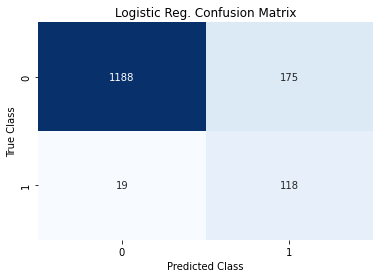

In [214]:
#create confusion matrix for logistic regression model
confusion_matrix_three = confusion_matrix(y_test, classifier3_pred)
confusion_df_three = pd.DataFrame(confusion_matrix_three)
sns.heatmap(confusion_df_three, annot=True, cbar=None, cmap='Blues', fmt='d')
plt.title('Logistic Reg. Confusion Matrix')
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()